In [1]:
# Import modules and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (13,10)
plt.style.use('bmh')
from datetime import timedelta
from keras.models import *
from keras.layers import *
from sklearn.preprocessing import *
import seaborn as sns
from sklearn.metrics import *
from keras.callbacks import *
%matplotlib inline

In [2]:
def preprocess(file):
    data = pd.read_csv(file)
    HUElec = pd.melt(data, id_vars=["Date"], var_name='time')
    HUElec['time'] = pd.to_timedelta(HUElec['time'].apply(lambda t: f"{t[:5]}:00")) - timedelta(minutes=30)
    HUElec['Date'] = pd.to_datetime(HUElec['Date'], format="%m/%d/%Y")
    HUElec['Datetime'] = HUElec['Date'] + HUElec['time']
    HUElec = HUElec.set_index('Datetime')
    HUElec = HUElec.drop(['Date', 'time'], axis=1).sort_index()

    return HUElec

In [3]:
building = 'HU'

In [4]:
file = 'C:\\Users\\moham\\OneDrive - De Montfort University\\Final Project\\Master_Thesis\\Dataset\\'+building+'Elec.csv'
data = preprocess(file)

data = data.resample(rule='d').mean().copy()

data = data.rename(columns={'value': 'Electric'})

data.head()

,Electric
Datetime,
2010-01-25,75.447000
2010-01-26,92.642500
2010-01-27,85.914958
2010-01-28,96.138875
2010-01-29,92.043229


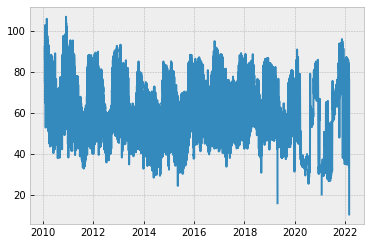

In [5]:
plt.plot(data)

In [6]:
file = 'C:\\Users\\moham\\OneDrive - De Montfort University\\Final Project\\Master_Thesis\\Dataset\\'+building+'Gas.csv'
data1 = preprocess(file)

data1 = data1.resample(rule='d').mean().copy()

data1 = data1.rename(columns={'value': 'Gas'})

data1.head()

,Gas
Datetime,
2010-01-25,49.536583
2010-01-26,143.147521
2010-01-27,138.752938
2010-01-28,152.652333
2010-01-29,157.730500


In [7]:
file = 'C:\\Users\\moham\\OneDrive - De Montfort University\\Final Project\\Master_Thesis\\Dataset\\'+building+'Water.csv'
data2 = preprocess(file)

data2 = data2.resample(rule='d').mean().copy()

data2 = data2.rename(columns={'value': 'Water'})

data2.head()

,Water
Datetime,
2010-02-02,0.102313
2010-02-03,0.375250
2010-02-04,0.428313
2010-02-05,0.377042
2010-02-06,0.089542


In [8]:
data1 = data1.loc['2010-02-02':]
data = data.loc['2010-02-02':]

new_data = data.join([data1,data2])

new_data.head()

,Electric,Gas,Water
Datetime,,,
2010-02-02,101.613979,139.386646,0.102313
2010-02-03,98.845000,182.338125,0.375250
2010-02-04,97.897604,152.264583,0.428313
2010-02-05,87.718333,134.719208,0.377042
2010-02-06,55.565125,135.339687,0.089542


array([<AxesSubplot:xlabel='Datetime'>, <AxesSubplot:xlabel='Datetime'>,
       <AxesSubplot:xlabel='Datetime'>], dtype=object)

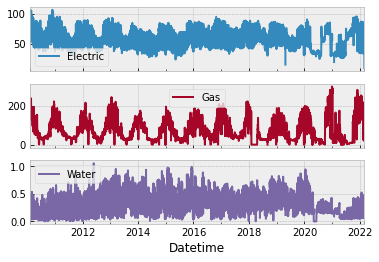

In [9]:
new_data.plot(subplots=True)

In [10]:
new_data.to_csv('C:\\Users\\moham\\OneDrive - De Montfort University\\Final Project\\Master_Thesis\\Dataset\\All_HU_Daily_Dataset.csv')